# **Scipy in Python**

SciPy (pronounced "Sigh Pie") is an open-source software for mathematics, science, and engineering. It includes modules for statistics, optimization, integration, linear algebra, Fourier transforms, signal and image processing, ODE solvers, and more.

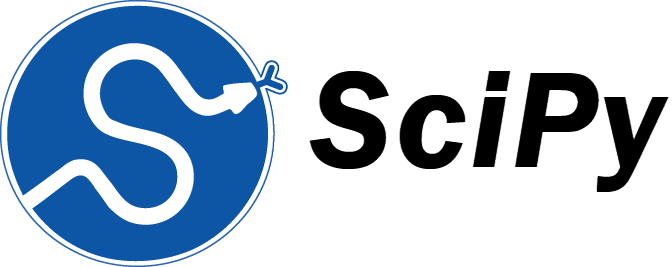

The SciPy Library includes modules for

* optimization,
* interpolation,
* signal processing,
* linear algebra,
* sparse matrix representation,
* KD-Trees, Delaunay triangulation, convex hull computation
statistics, and others


We will be looking at:

* File input/output: scipy.io
* Special functions: scipy.special
* Linear algebra operations: scipy.linalg
* Interpolation: scipy.interpolate
* Optimization and fit: scipy.optimize
* Statistics and random numbers: scipy.stats
* Numerical integration: scipy.integrate
* Fast Fourier transforms: scipy.fftpack
* Signal processing: scipy.signal
* Image manipulation: scipy.ndimage

scipy is composed of task-specific sub-modules and they all depend on numpy but mostly independent of each other.

In [ ]:
!python -m pip install pip --upgrade --user -q
!python -m pip install numpy pandas scipy matplotlib --user -q

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

## **File Input/ Output**

Loading and Saving Matlab Files

In [ ]:
from scipy import io as spio
import numpy as np
import matplotlib.pyplot as plt

a = np.ones((3, 3))

# spio.savemat('file.mat', {'a': a}) # savemat expects a dictionary

# data = spio.loadmat('file.mat')

a

## **Special Functions**



* Bessel function, such as s`cipy.special.jn()` (nth integer order Bessel function)
* Elliptic function (`scipy.special.ellipj()` for the Jacobian elliptic function, …)
* Gamma function: `scipy.special.gamma()`, also note `scipy.special.gammaln() `which will give the log of Gamma to a higher numerical precision.
* Erf, the area under a Gaussian curve: `scipy.special.erf()`





## **Linear Algegra Operations**

The `scipy.linalg` module provides standard linear algebra operations, relying on an underlying efficient implementation (BLAS, LAPACK).

The `scipy.linalg.det(`) function computes the determinant of a square matrix:

In [ ]:
from scipy import linalg

arr = np.array([[1, 2],

                [3, 4]])

linalg.det(arr)

In [ ]:
arr = np.array([[3, 2],

                [6, 4]])

linalg.det(arr) 

In [ ]:
#we can calculate determinant of the square matrix only, that's why it gave error.
linalg.det(np.ones((3, 4)))

The scipy.linalg.inv() function computes the inverse of a square matrix:

In [ ]:
arr = np.array([[1, 2],

                [3, 4]])

iarr = linalg.inv(arr)

iarr

Finally computing the inverse of a singular matrix (its determinant is zero) will raise LinAlgError:

In [ ]:
arr = np.array([[3, 2],

                [6, 4]])

linalg.inv(arr)

## **Interpolation**

scipy.interpolate is useful for fitting a function from experimental data and thus evaluating points where no measure exists. The module is based on the [FITPACK Fortran subroutines](http://www.netlib.org/dierckx/index.html).

By imagining experimental data close to a sine function:

In [ ]:
measured_time = np.linspace(0, 1, 10)

noise = (np.random.random(10)*2 - 1) * 1e-1

measures = np.sin(2 * np.pi * measured_time) + noise

`scipy.interpolate.interp1d` can build a linear interpolation function:

In [ ]:
from scipy.interpolate import interp1d

linear_interp = interp1d(measured_time, measures)

Then the result can be evaluated at the time of interest:

In [ ]:
interpolation_time = np.linspace(0, 1, 50)

linear_results = linear_interp(interpolation_time)

A cubic interpolation can also be selected by providing the kind optional keyword argument:

In [ ]:
cubic_interp = interp1d(measured_time, measures, kind='cubic')

cubic_results = cubic_interp(interpolation_time)

To plot these:

In [ ]:

# Plot the data and the interpolation
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(measured_time, measures, 'o', ms=6, label='measures')
plt.plot(interpolation_time, linear_results, label='linear interp')
plt.plot(interpolation_time, cubic_results, label='cubic interp')
plt.legend()
plt.show()


## **Optimization**

Optimization is the problem of finding a numerical solution to a minimization or equality.

The `scipy.optimize` module provides algorithms for function minimization (scalar or multi-dimensional), curve fitting and root finding.

In [ ]:
from scipy import optimize

### **Curve Fitting**

Suppose we have data on a sine wave, with some noise:

In [ ]:
x_data = np.linspace(-5, 5, num=50)

y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)

If we know that the data lies on a sine wave, but not the amplitudes or the period, we can find those by least squares curve fitting. First we have to define the test function to fit, here a sine with unknown amplitude and period:

In [ ]:
def test_func(x, a, b):
    return a * np.sin(b * x)

We then use `scipy.optimize.curve_fit()` to find a and b:

In [ ]:
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])
print(params)

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fitted function')

plt.legend(loc='best')

plt.show()

### **Finding the minimum of a scalar function**

Let’s define the following function:

In [ ]:
def f(x):
    return x**2 + 10*np.sin(x)

And Plot it

In [ ]:
x = np.arange(-10, 10, 0.1)

plt.plot(x, f(x)) 

plt.show()

This function has a global minimum around -1.3 and a local minimum around 3.8.

Searching for minimum can be done with [`scipy.optimize.minimize()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html), given a starting point `x0`, it returns the location of the minimum that it has found:

In [ ]:
result = optimize.minimize(f, x0=0)
result

In [ ]:
result.x # The coordinate of the minimum  

**Note:** The result of `scipy.optimize.minimize()` is a compound object comprising all information on the convergence 

Methods: As the function is a smooth function, gradient-descent based methods are good options. The **lBFGS algorithm** is a good choice in general:

In [ ]:
optimize.minimize(f, x0=0, method="L-BFGS-B")  

Note how it cost only 12 functions evaluation above to find a good value for the minimum.

**Global minimum:** A possible issue with this approach is that, if the function has local minima, the algorithm may find these local minima instead of the global minimum depending on the initial point `x0`:

In [ ]:
res_global = optimize.minimize(f, x0=3, method="L-BFGS-B")

res_global.x

If we don’t know the neighborhood of the global minimum to choose the initial point, we need to resort to costlier global optimization. To find the global minimum, we use` scipy.optimize.basinhopping()`. It combines a local optimizer with sampling of starting points

In [ ]:
optimize.basinhopping(f, 0) 

Constraints: We can constrain the variable to the interval` (0, 10)` using the “bounds” argument:



**A list of bounds**

As `minimize()` works in general with `x` multidimensionsal, the “bounds” argument is a list of bound on each dimension.


In [ ]:
res = optimize.minimize(f, x0=1,bounds=((0, 10), ))

What has happened? Why are we finding 0, which is not a mimimum of our function.



**Note**

[`scipy.optimize.minimize_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar) is a function with dedicated methods to minimize functions of only one variable. 

###**Finding the roots of a scalar function**

To find a root, i.e. a point where ***f(x) = 0***, of the function `f` above we can use [`scipy.optimize.root()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html#scipy.optimize.root):

In [ ]:
root = optimize.root(f, x0=1)  # our initial guess is 1
root    # The full result

Note that only one root is found. Inspecting the plot of ***f*** reveals that there is a second root around -2.5. We find the exact value of it by adjusting our initial guess:

In [ ]:
root2 = optimize.root(f, x0=-2.5)
root2.x



**Note:** `scipy.optimize.root()` also comes with a variety of algorithms, set via the “method” argument. 

Now that we have found the minima and roots of f and used curve fitting on it, we put all those results together in a single plot:

In [ ]:
res.x

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

# Plot the function
ax.plot(x, f(x), 'b-', label="f(x)")

# Plot the minima
xmin_local = result.x
xmin_global = res_global.x
xmins = np.array([xmin_global[0], xmin_local[0]])
ax.plot(xmins, f(xmins), 'go', label="Minima")

# Plot the roots
roots = np.array([root.x, root2.x])
ax.plot(roots, f(roots), 'kv', label="Roots")

# Decorate the figure
ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.axhline(0, color='gray')
plt.show()

## **Statistics and Random Numbers**

The module [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats) contains statistical tools and probabilistic descriptions of random processes. Random number generators for various random process can be found in [`numpy.random`](https://numpy.org/doc/stable/reference/random/index.html#module-numpy.random).

### **Distributions: histogram and probability density function**

Given observations of a random process, their histogram is an estimator of the random process’s PDF (probability density function):

In [ ]:
samples = np.random.normal(size=1000)

bins = np.arange(-4, 5)

bins


In [ ]:

histogram = np.histogram(samples, bins=bins, density=True)[0]

bins = 0.5*(bins[1:] + bins[:-1])

bins

In [ ]:
from scipy import stats

pdf = stats.norm.pdf(bins)  # norm is a distribution object

plt.plot(bins, histogram) 


plt.plot(bins, pdf) 

If we know that the random process belongs to a given family of random processes, such as normal processes, we can do a [maximum-likelihood fit](https://analyticsindiamag.com/goodness-of-fit-python-guide/) of the observations to estimate the parameters of the underlying distribution. Here we fit a normal process to the observed data:

In [ ]:
loc, std = stats.norm.fit(samples)

print(loc)     
print(std)   



**The distribution objects**

scipy.stats.norm is a distribution object: each distribution in scipy.stats is represented as an object. Here it’s the normal distribution, and it comes with a PDF, a CDF, and much more.


### **Mean, median and percentiles**

The mean is an estimator of the center of the distribution:

In [ ]:
np.mean(samples)     

The median another estimator of the center. It is the value with half of the observations below, and half above:

In [ ]:
np.median(samples)     

Unlike the mean, the median is not sensitive to the tails of the distribution. It is [“robust”](https://en.wikipedia.org/wiki/Robust_statistics).

The median is also the percentile 50, because 50% of the observation are below it:

In [ ]:
stats.scoreatpercentile(samples, 50)     

Similarly, we can calculate the percentile 90:

In [ ]:
stats.scoreatpercentile(samples, 90)     



The percentile is an estimator of the CDF: cumulative distribution function.


### **Statistical tests**

A statistical test is a decision indicator. For instance, if we have two sets of observations, that we assume are generated from Gaussian processes, we can use a [T-test](https://analyticsindiamag.com/z-test-t-test-statistcs/) to decide whether the means of two sets of observations are significantly different:

In [ ]:
a = np.random.normal(0, 1, size=100)

b = np.random.normal(1, 1, size=10)
# Compute a histogram of the sample
bins = np.linspace(-4, 4, 30)
histogram1, bins = np.histogram(a, bins=bins, density=True)
histogram2, bins = np.histogram(b, bins=bins, density=True)

plt.figure(figsize=(6, 4))
plt.hist(a, bins=bins, density=True, label="Samples 1")
plt.hist(b, bins=bins, density=True, label="Samples 2")
plt.legend(loc='best')
plt.show()

In [ ]:
stats.ttest_ind(a, b)   

The resulting output is composed of:

> * The T statistic value: it is a number the sign of which is proportional to the difference between the two random processes and the magnitude is related to the significance of this difference.

> * the p value: the probability of both processes being identical. If it is close to 1, the two process are almost certainly identical. The closer it is to zero, the more likely it is that the processes have different means.



**Please refer to [statistics](https://scipy-lectures.org/packages/statistics/index.html#statistics) module for all the statistics required for data science**

## **Numerical Integration**

[`scipy.integral`](https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate)

The most generic integration routine is [`scipy.integrate.quad()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad). To compute:

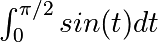

In [ ]:
from scipy.integrate import quad

res, err = quad(np.sin, 0, np.pi/2)

In [ ]:
res # res is the result, is should be close to 1



In [ ]:
err # err is an estimate of the err

### **Integrating differential equations**

[`scipy.integrate`](https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate) also features routines for integrating [Ordinary Differential Equations](https://en.wikipedia.org/wiki/Ordinary_differential_equation) (ODE). In particular, [`scipy.integrate.odeint()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint) solves ODE of the form:

`dy/dt = rhs(y1, y2, .., t0,...)`

As an introduction, let us solve the ODE 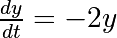 between e5b174354c162b0ceffce059f27209982d90eb10.png, with the initial condition 144939cf068a446c48642acd9e895f7a7132d70a.png. First the function computing the derivative of the position needs to be defined:

In [ ]:
def calc_derivative(ypos, time):

    return -2 * ypos

Then, to compute `y` as a function of time:

In [ ]:
from scipy.integrate import odeint

time_vec = np.linspace(0, 4, 40)

y = odeint(calc_derivative, y0=1, t=time_vec)

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot(time_vec, y)
plt.xlabel('t: Time')
plt.ylabel('y: Position')
plt.tight_layout()


Let us integrate a more complex ODE:[ a damped spring-mass oscillator](https://en.wikipedia.org/wiki/Harmonic_oscillator#Damped_harmonic_oscillator). The position of a mass attached to a spring obeys the 2nd order ODE 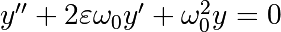 with 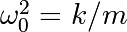with 0b7c1e16a3a8a849bb8ffdcdbf86f65fd1f30438.png the spring constant,edba97b4c0d864d26e92ea7ea73767fa38eef3f7.png the mass and 9c2310c8da009c667752c2230b76b7ba716f7820.png with ae12a24f88803b5895632e4848d87d46483c492c.png the damping coefficient. We set:

In [ ]:
mass = 0.5  # kg

kspring = 4  # N/m

cviscous = 0.4  # N s/m

Hence,

In [ ]:
eps = cviscous / (2 * mass * np.sqrt(kspring/mass))

omega = np.sqrt(kspring / mass)

The system is underdamped, as:

In [ ]:
eps<1

For `odeint()`, the 2nd order equation needs to be transformed in a system of two first-order equations for the vector **Y = (y, y')**: the function computes the velocity and acceleration:

In [ ]:
def calc_deri(yvec, time, eps, omega):

    return (yvec[1], -2.0 * eps * omega * yvec[1] - omega **2 * yvec[0])

Integration of the system follows:

In [ ]:
time_vec = np.linspace(0, 10, 100)

yinit = (1, 0)

yarr = odeint(calc_deri, yinit, time_vec, args=(eps, omega))

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot(time_vec, yarr[:, 0], label='y')
plt.plot(time_vec, yarr[:, 1], label="y'")
plt.legend(loc='best')
plt.show()



`scipy.integrate.odeint()` uses the LSODA (Livermore Solver for Ordinary Differential equations with Automatic method switching for stiff and non-stiff problems), see the [ODEPACK Fortran library](people.sc.fsu.edu/~jburkardt/f77_src/odepack/odepack.html) for more details.

## **Fast Fourier Transformation**

The[` scipy.fftpack`](https://docs.scipy.org/doc/scipy/reference/fftpack.html#module-scipy.fftpack) module computes fast Fourier transforms (FFTs) and offers utilities to handle them. The main functions are:

> * [`scipy.fftpack.fft()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fft.html#scipy.fftpack.fft) to compute the FFT
> * [`scipy.fftpack.fftfreq()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fftfreq.html#scipy.fftpack.fftfreq) to generate the sampling frequencies
> * [`scipy.fftpack.ifft()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.ifft.html#scipy.fftpack.ifft) computes the inverse FFT, from frequency space to signal space


As an illustration, a (noisy) input signal (sig), and its FFT:

In [ ]:
from scipy import fftpack
time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig = (np.sin(2 * np.pi / period * time_vec)
       + 0.5 * np.random.randn(time_vec.size))

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')

Compute and plot the power:

In [ ]:
# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)**2

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

# Check that it does indeed correspond to the frequency that we generate
# the signal with
np.allclose(peak_freq, 1./period)

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])

# scipy.signal.find_peaks_cwt can also be used for more advanced
# peak detection


We now remove all the high frequencies and transform back from frequencies to signal.

In [ ]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')


As the signal comes from a real function, the Fourier transform is symmetric.

The peak signal frequency can be found with `freqs[power.argmax()]`

Setting the Fourrier component above this frequency to zero and inverting the FFT with `scipy.fftpack.ifft()`, gives a filtered signal.

## **Signal Processing**

[`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal) is for typical signal processing: 1D, regularly-sampled signals. 

**Resampling** 


[`scipy.signal.resample()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.resample.html#scipy.signal.resample): resample a signal to n points using FFT

In [ ]:
t = np.linspace(0, 5, 100)

x = np.sin(t)

from scipy import signal

x_resampled = signal.resample(x, 25)
plt.plot(t, x) 
plt.plot(t[::4], x_resampled, 'ko') 



Notice how on the side of the window the resampling is less accurate and has a rippling effect.

This resampling is different from the interpolation provided by `scipy.interpolate` as it only applies to regularly sampled data.

**Detrending** 


[`scipy.signal.detrend()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.detrend.html#scipy.signal.detrend): remove linear trend from signal:

In [ ]:
t = np.linspace(0, 5, 100)

x = t + np.random.normal(size=100)

from scipy import signal

x_detrended = signal.detrend(x)

plt.plot(t, x) 
plt.plot(t, x_detrended) 

**Filtering:** For non-linear filtering,` scipy.signal` has filtering (median filter [`scipy.signal.medfilt()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.medfilt.html#scipy.signal.medfilt), Wiener [`scipy.signal.wiener()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.wiener.html#scipy.signal.wiener)), but we will discuss this in the image section.

`scipy.signal` also has a full-blown set of tools for the design of linear filter (finite and infinite response filters), but this is out of the scope of this tutorial.

**Spectral analysis:** [`scipy.signal.spectrogram()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html#scipy.signal.spectrogram) compute a spectrogram –frequency spectrums over consecutive time windows–, while [`scipy.signal.welch()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html#scipy.signal.welch) comptes a power spectrum density (PSD).

## **Image Processing**

[`scipy.ndimage`](https://docs.scipy.org/doc/scipy/reference/ndimage.html#module-scipy.ndimage) provides manipulation of n-dimensional arrays as images.

### **Geometrical transformations on images**


Changing orientation, resolution, ..

In [ ]:
from scipy import misc  # Load an image

face = misc.face(gray=True)

from scipy import ndimage # Shift, roate and zoom it

shifted_face = ndimage.shift(face, (50, 50))

shifted_face2 = ndimage.shift(face, (50, 50), mode='nearest')

rotated_face = ndimage.rotate(face, 30)

cropped_face = face[50:-50, 50:-50]

zoomed_face = ndimage.zoom(face, 2)

zoomed_face.shape

In [ ]:
plt.figure(figsize=(15, 3))
plt.subplot(151)
plt.imshow(shifted_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(152)
plt.imshow(shifted_face2, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(153)
plt.imshow(rotated_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(154)
plt.imshow(cropped_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(155)
plt.imshow(zoomed_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.99)

plt.show()

### **Image filtering**

Generate a noisy face:

In [ ]:
from scipy import misc

face = misc.face(gray=True)

face = face[:512, -512:]  # crop out square on right

import numpy as np

noisy_face = np.copy(face).astype(np.float)

noisy_face += face.std() * 0.5 * np.random.standard_normal(face.shape)

Apply a variety of filters on it:

In [ ]:
blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3)

median_face = ndimage.median_filter(noisy_face, size=5)

from scipy import signal

wiener_face = signal.wiener(noisy_face, (5, 5))

In [ ]:
plt.figure(figsize=(12, 3.5))
plt.subplot(141)
plt.imshow(noisy_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('noisy')

plt.subplot(142)
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gaussian filter')

plt.subplot(143)
plt.imshow(median_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('median filter')

plt.subplot(144)
plt.imshow(wiener_face, cmap=plt.cm.gray)
plt.title('Wiener filter')
plt.axis('off')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.99)

plt.show()

### **Mathematical morphology**

[Mathematical morphology](https://en.wikipedia.org/wiki/Mathematical_morphology) stems from set theory. It characterizes and transforms geometrical structures. Binary (black and white) images, in particular, can be transformed using this theory: the sets to be transformed are the sets of neighboring non-zero-valued pixels. The theory was also extended to gray-valued images.

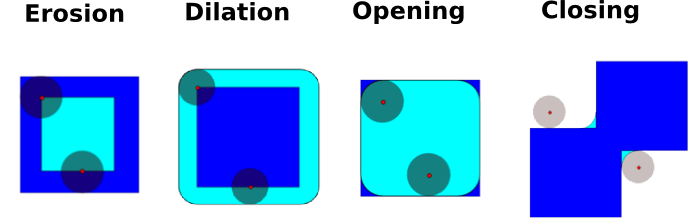

In [ ]:
el = ndimage.generate_binary_structure(2, 1)
el 

In [ ]:
el.astype(np.int)

**Erosion:** 

[`scipy.ndimage.binary_erosion()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.binary_erosion.html#scipy.ndimage.binary_erosion)

In [ ]:
a = np.zeros((7, 7), dtype=np.int)

a[1:6, 2:5] = 1

a

In [ ]:
ndimage.binary_erosion(a).astype(a.dtype)

In [ ]:
#Erosion removes objects smaller than the structure

ndimage.binary_erosion(a, structure=np.ones((5,5))).astype(a.dtype)


**Dilation** 

[`scipy.ndimage.binary_dilation()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.binary_dilation.html#scipy.ndimage.binary_dilation)

In [ ]:
a = np.zeros((5, 5))

a[2, 2] = 1

a


In [ ]:
ndimage.binary_dilation(a).astype(a.dtype)

**Opening** 

[`scipy.ndimage.binary_opening()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.binary_opening.html#scipy.ndimage.binary_opening)

In [ ]:
a = np.zeros((5, 5), dtype=np.int)
a[1:4, 1:4] = 1
a[4, 4] = 1
a

In [ ]:
# Opening removes small objects
ndimage.binary_opening(a, structure=np.ones((3, 3))).astype(np.int)

In [ ]:
# Opening can also smooth corners
ndimage.binary_opening(a).astype(np.int)

An opening operation removes small structures, while a closing operation fills small holes. Such operations can therefore be used to “clean” an image.

In [ ]:
a = np.zeros((50, 50))

a[10:-10, 10:-10] = 1

a += 0.25 * np.random.standard_normal(a.shape)

mask = a>=0.5

opened_mask = ndimage.binary_opening(mask)

closed_mask = ndimage.binary_closing(opened_mask)

In [ ]:
plt.figure(figsize=(12, 3.5))
plt.subplot(141)
plt.imshow(a, cmap=plt.cm.gray)
plt.axis('off')
plt.title('a')

plt.subplot(142)
plt.imshow(mask, cmap=plt.cm.gray)
plt.axis('off')
plt.title('mask')

plt.subplot(143)
plt.imshow(opened_mask, cmap=plt.cm.gray)
plt.axis('off')
plt.title('opened_mask')

plt.subplot(144)
plt.imshow(closed_mask, cmap=plt.cm.gray)
plt.title('closed_mask')
plt.axis('off')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.99)

plt.show()

For gray-valued images, eroding (resp. dilating) amounts to replacing a pixel by the minimal (resp. maximal) value among pixels covered by the structuring element centered on the pixel of interest.

In [ ]:
a = np.zeros((7, 7), dtype=np.int)
a[1:6, 1:6] = 3
a[4, 4] = 2; a[2, 3] = 1
a

In [ ]:
ndimage.grey_erosion(a, size=(3, 3))

### **Connected components and measurements on images**

Let us first generate a nice synthetic binary image.

In [ ]:
x, y = np.indices((100, 100))
sig = np.sin(2*np.pi*x/50.) * np.sin(2*np.pi*y/50.) * (1+x*y/50.**2)**2
mask = sig > 1

In [ ]:

plt.figure(figsize=(7, 3.5))
plt.subplot(1, 2, 1)
plt.imshow(sig)
plt.axis('off')
plt.title('sig')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap=plt.cm.gray)
plt.axis('off')
plt.title('mask')
plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.9)

[`scipy.ndimage.label()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.label.html#scipy.ndimage.label) assigns a different label to each connected component:

In [ ]:
labels, nb = ndimage.label(mask)
nb

In [ ]:
plt.figure(figsize=(3.5, 3.5))
plt.imshow(labels)
plt.title('label')
plt.axis('off')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.9)

Now compute measurements on each connected component:

In [ ]:
areas = ndimage.sum(mask, labels, range(1, labels.max()+1))
areas   # The number of pixels in each connected component

In [ ]:
maxima = ndimage.maximum(sig, labels, range(1, labels.max()+1))
maxima  # The maximum signal in each connected component

Extract the 4th connected component, and crop the array around it:

In [ ]:
ndimage.find_objects(labels==4) 
sl = ndimage.find_objects(labels==4)
from matplotlib import pyplot as plt
plt.imshow(sig[sl[0]])